# Analysis on zomato's cleaned webscapped dataset and Revealing some awesome question's answer

## Alert:  This notebook contains lots of graphs or plots whatever we call.  Be ready!

In [10]:
#importng necessary libraries
import pandas as pd
from itertools import combinations
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

### csv file I cleaned with all of my blood,sweat and tears

In [11]:
df=pd.read_csv('Zomato_cleaned.csv')

In [12]:
df.head(3)

,Restaurant,Cousines,Rating,Rating_counts,Delivery_rating,Delivery_rating_counts,Area,Adress,Price_for_2,1st_time_open,1st_time_close,2nd_time_open,2nd_time_close,week
0,Jassi De Parathe,North Indian,4.7,1634.0,4.2,18500.0,Alkapuri,"R.C Dutt Road, Near Kalaniketan, Alkapuri, Vad...",600,2020-10-15 11:00:00,2020-10-15 23:30:00,NaN,NaN,Mon-Sun)
1,Marwari Food Corner,"North Indian, Rajasthani, Fast Food, Chinese",4.3,1505.0,3.8,29200.0,Karelibaug,"Shop No. 21 & 22 Ratri-bazaar, Mangal Pandey R...",250,2020-10-15 16:00:00,2020-10-15 02:00:00,NaN,NaN,Mon-Sun)
2,KFC,"Burger, Fast Food, Finger Food, Beverages",4.2,1003.0,4.3,16800.0,Alkapuri,"19, Ground Floor, Vadodara Central Mall, Near ...",450,2020-10-15 13:00:00,2020-10-15 21:30:00,NaN,NaN,Mon-Sun)


## Which cousine type restaurents are most in population?


In [13]:
df['Cousines']=df['Cousines'].str.replace(' ','')

In [14]:
counter=Counter()

for row in df['Cousines']:
    row_list=row.split(',')
    counter.update(Counter(combinations(row_list,1)))
    
keys=[]
values=[]
for key,value in counter.most_common(10):
    keys.append(key)
    values.append(value)
    
cousines= pd.DataFrame({
    'Pair':keys,
    'Count':values
})

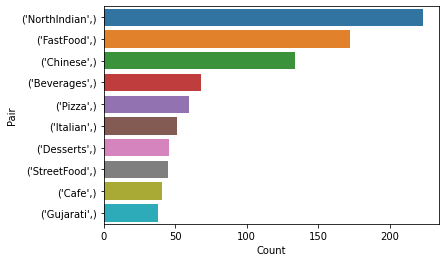

In [15]:
sns.barplot(y='Pair',x='Count',data=cousines,orient='h')
plt.show()

### NorthIndian as expected,  note that here North Indian means Punjabi Restaurents who serves punjabi dishes. 

## Which cousine type restaurent is rare?

In [16]:
counter=Counter()

for row in df['Cousines']:
    row_list=row.split(',')
    counter.update(Counter(combinations(row_list,1)))
    
keys=[]
values=[]

#print(counter.most_common()[-10:-1])

for key,value in counter.most_common()[-11:-1]:
    keys.append(key)
    values.append(value)
    
cousines2= pd.DataFrame({
    'Pair':keys,
    'Count':values
})

In [17]:
cousines2

,Pair,Count
0,"(Burmese,)",1
1,"(BBQ,)",1
2,"(Turkish,)",1
3,"(Afghan,)",1
4,"(Mishti,)",1
5,"(Odia,)",1
6,"(Indian,)",1
7,"(Paan,)",1
8,"(Portuguese,)",1
9,"(RoastChicken,)",1


### Looks like we have some international cousines such as Turkis, Afghan, Portuguese. These has to be rare. Also someone unknowinfly put Indian in cousines, he might have forgotten he's Indian. 

## Which Cousine's restaurents has most counts (in pair) from all restaurents?

In [18]:
Cousines=['NorthIndian','FastFood','Chinese','Beverages','Pizza','Italian','Desserts','StreetFood','Cafe','Gujarati']

In [19]:
counter=Counter()

for row in df['Cousines']:
    row_list=row.split(',')
    counter.update(Counter(combinations(row_list,2)))
    
keys=[]
values=[]
for key,value in counter.most_common(10):
    keys.append(key)
    values.append(value)
    
cousines= pd.DataFrame({
    'Pair':keys,
    'Count':values
})

In [20]:
cousines

,Pair,Count
0,"(NorthIndian, Chinese)",85
1,"(NorthIndian, FastFood)",27
2,"(FastFood, Beverages)",26
3,"(Pizza, FastFood)",23
4,"(Cafe, FastFood)",20
5,"(NorthIndian, Biryani)",19
6,"(Chinese, NorthIndian)",19
7,"(NorthIndian, Continental)",18
8,"(Desserts, Beverages)",17
9,"(NorthIndian, Italian)",17


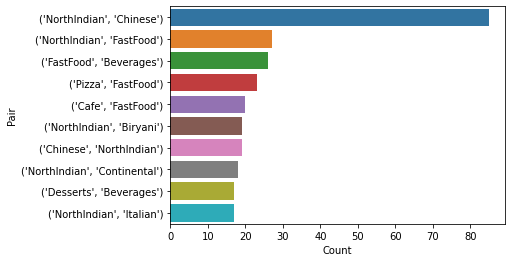

In [21]:
sns.barplot(y='Pair',x='Count',data=cousines,orient='h')
plt.show()

### NorthIndian + Chinese 
### I'm not big fan of chinese food but, Looks like it's popular.

## Let's look pair of 3

In [22]:
counter=Counter()

for row in df['Cousines']:
    row_list=row.split(',')
    counter.update(Counter(combinations(row_list,3)))
    
keys=[]
values=[]

#print(counter.most_common()[-10:-1])

for key,value in counter.most_common(10):
    keys.append(key)
    values.append(value)
    
cousines= pd.DataFrame({
    'Pair':keys,
    'Count':values
})

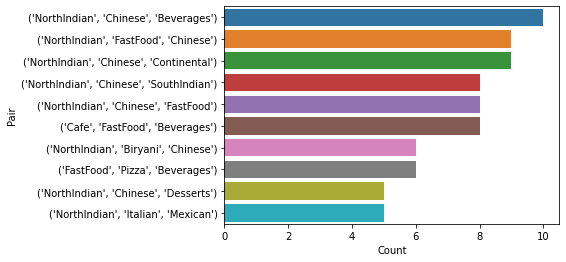

In [23]:
sns.barplot(y='Pair',x='Count',data=cousines,orient='h')
plt.show()

### NorthIndian, Chinese followed by Beverages. Cool!
### There is only one or two count differences in top 6, so there is no clear winner.

## Which Area has most number of zomato restaurents?

<AxesSubplot:xlabel='count', ylabel='Area'>

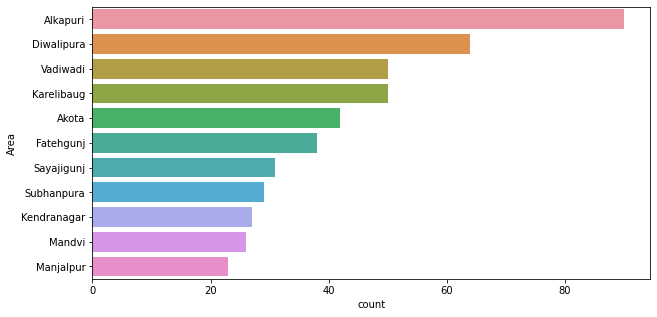

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(y='Area',data=df,orient='h',order=df['Area'].value_counts().iloc[:11].index)

### Alkapuri has lots of restaurents on zomato platform. I'm not sure about the reason But I'll update as I know

## [skip to next question](#which-area-is-famous-for-which-cousine-type)

### Distribution of Rating and Rating Counts AND Delivery Rating and Delivery Rating Counts

<AxesSubplot:xlabel='Rating', ylabel='count'>

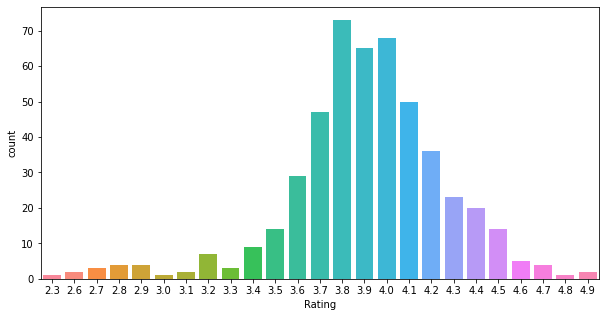

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Rating',data=df,saturation=10)

In [26]:
df_rating = df['Rating'].value_counts().rename_axis('Rating').to_frame('counts')

In [27]:
df_rating['%']=df_rating['counts']/487*100

In [28]:
df_rating.loc[3.8:4.1,'%'].sum()

52.56673511293634

### 52.56% of rating values are between 3.8 to 4.1

Text(0.5, 1.0, 'Histogram of Rating counts')

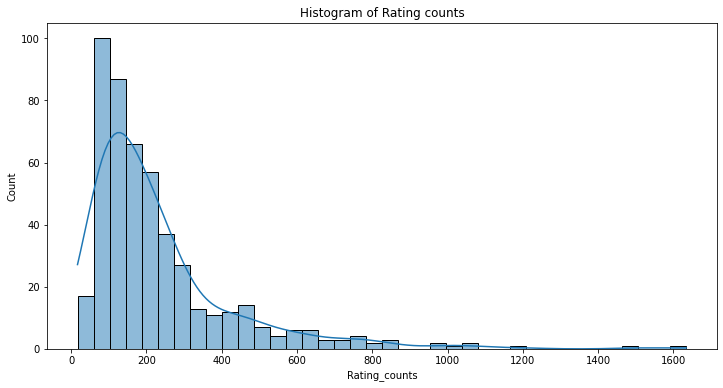

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(x='Rating_counts',data=df,kde=True).set_title('Histogram of Rating counts')

<AxesSubplot:xlabel='Delivery_rating', ylabel='count'>

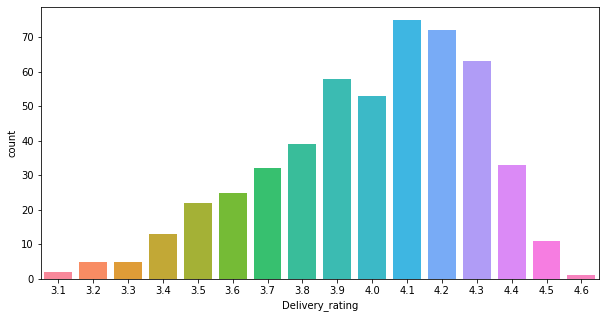

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='Delivery_rating',data=df,saturation=10)

<AxesSubplot:xlabel='Rating_counts', ylabel='Probability'>

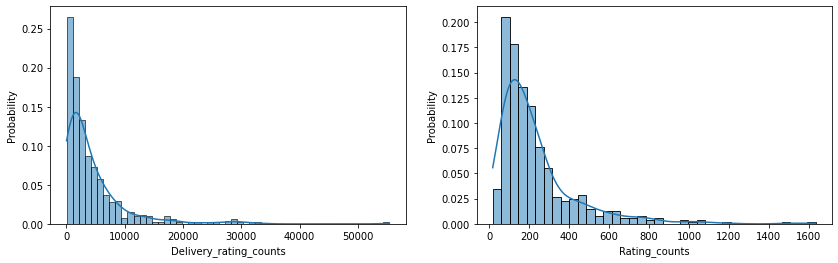

<Figure size 504x288 with 0 Axes>

In [31]:
f,axes = plt.subplots(1,2,figsize=(14,4))
plt.figure(figsize=(7,4))
sns.histplot(x='Delivery_rating_counts',data=df,kde=True,stat='probability',ax=axes[0])
sns.histplot(x='Rating_counts',data=df,kde=True,stat='probability',ax=axes[1])

### Both rating counts graphs are intresting, for me Rating counts follows left sided skewed normal distribution whereas Delivery rating counts follow exponential  distribution. We can find probability of any given point with distribution's parameter

<AxesSubplot:xlabel='Price_for_2', ylabel='Count'>

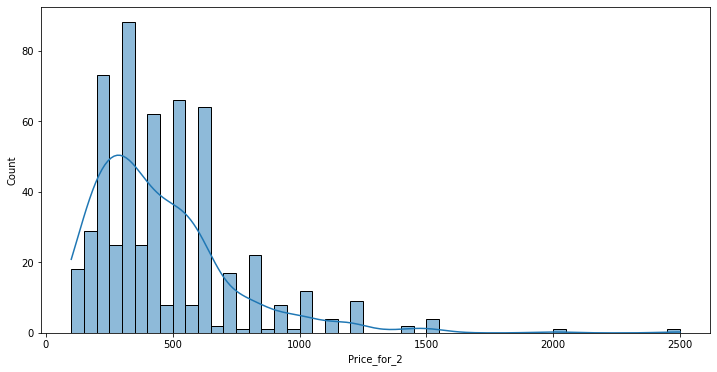

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(x='Price_for_2',data=df,kde=True,binwidth=50)


### There is huge value counts difference between two series one follows like 200,300,400,.. and other one like 250,350,450,.


## which area is famous for which cousine type

In [33]:
df['Area'].unique()

array(['Alkapuri', 'Karelibaug', 'Mandvi', 'Nizampura', 'Kendranagar',
       'Vadiwadi', 'Akota', 'Makarpura', 'Diwalipura', 'Sayajigunj',
       'Fatehgunj', 'Manjalpur', 'Gotri', 'Subhanpura', 'Gorwa', 'Bhayli',
       'Suryanagar', 'Sayajipura', 'Sama', 'Panchvati', 'Tarsali',
       'Navapura', 'L&T Knowledge City', 'Yakutpura'], dtype=object)

In [34]:
df_dic={}
for x in df['Area'].unique(): 
    index = df[df['Area']==x].index
    df_x = df.loc[index]
    
    cousines=[]
    for i in Cousines:
        
        Rating_mean = df_x[df_x['Cousines'].str.contains(i)]['Rating'].mean()
        dict1={'Cousines':i,'Rating':Rating_mean}
        cousines.append(dict1)

    df_dic["{0}".format(x)]=pd.DataFrame(cousines)

<AxesSubplot:xlabel='Cousines', ylabel='Rating'>

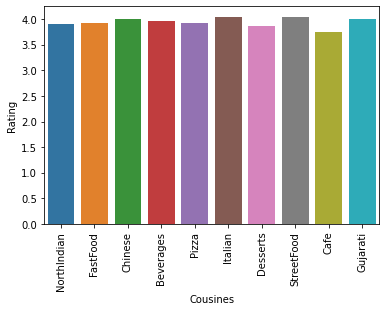

In [35]:
plt.xticks(rotation='vertical')
sns.barplot(x='Cousines',y='Rating',data=df_dic['Diwalipura'])

### This Doesn't give us any good interpretation, The reason is we used only rating feature to check which cousines is popular in particular area. which is not accurate, simple reason is we comletly neglet delivery columns as well as rating counts if one shop has high rating and less number of rating counts then chances are that shop might not as good as we judge from rating. 

### Similarly for Delivery rating and delivery rating counts. Problem is as we webscrapped zomato's website we didn't find any great feature to compare restaurents. like number of orders being recived in one day or something like popularity of restaurent.

### So we need to fix inquality in Rating, For that we will multiply rating with rating_counts

#### For an example, rating=4, rating_counts=100  popularity=400 and rating=3.5, rating_counts=150 popularity=525
    


### And if we want to find best restaurant in particular area or on whole zomato site for (Vadodara), we shoud include Delivery rating and delivery rating counts

In [36]:
df['Popularity']=df['Rating']*df['Rating_counts']

In [37]:
df['Popularity'].head()

0    7679.8
1    6471.5
2    4212.6
3    3143.3
4    4333.5
Name: Popularity, dtype: float64

In [38]:
dic_pop={}
for x in df['Area'].unique(): 
    index = df[df['Area']==x].index
    df_x = df.loc[index]
    
    cousines=[]
    for i in Cousines:
        
        Popularity_mean = df_x[df_x['Cousines'].str.contains(i)]['Popularity'].mean()
        dict1={'Cousines':i,'Popularity':Popularity_mean}
        cousines.append(dict1)

    dic_pop["{0}".format(x)]=pd.DataFrame(cousines)

<AxesSubplot:xlabel='Cousines', ylabel='Popularity'>

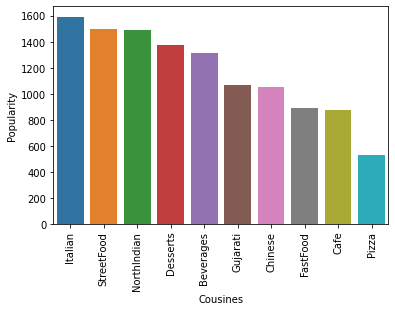

In [39]:
plt.xticks(rotation='vertical')
sns.barplot(x='Cousines',y='Popularity',data=dic_pop['Alkapuri'].sort_values(by=['Popularity'],ascending=False))

In [40]:
index = df[df['Area']=='Alkapuri'].index
df_x = df.loc[index]
box = df_x[df_x['Cousines'].str.contains('Italian')]['Popularity']

<AxesSubplot:title={'center':'Outlier In italian Cousine'}, xlabel='Popularity'>

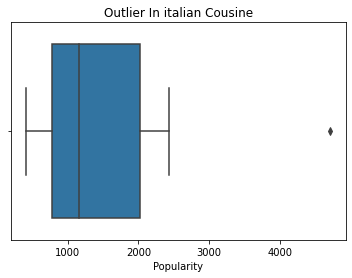

In [43]:
plt.title('Outlier In italian Cousine')
sns.boxplot(x=box)

### Yeah.. Italian has an outlier, but again other cousines have outliers too. So, we are expecting better results with Median.

In [299]:
dic_poop_median={}
for x in df['Area'].unique(): 
    index = df[df['Area']==x].index
    df_x = df.loc[index]
    
    cousines=[]
    for i in Cousines:
        
        Popularity_median = df_x[df_x['Cousines'].str.contains(i)]['Popularity'].median()
        dict1={'Cousines':i,'Popularity':Popularity_median}
        cousines.append(dict1)

    dic_poop_median["{0}".format(x)]=pd.DataFrame(cousines)

<AxesSubplot:xlabel='Cousines', ylabel='Popularity'>

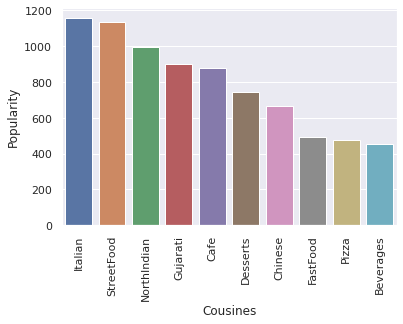

In [300]:
plt.xticks(rotation='vertical')
sns.barplot(x='Cousines',y='Popularity',data=dic_poop_median['Alkapuri'].sort_values(by=['Popularity'],ascending=False))

### -_- -_- -_- -_- 3 eternity Later -_- -_- -_- -_-

### I got this, Problem is less number of restaurent counts. Italian cousine restaurents are very less and they have high ratings, which causing this result. It's data science, we must prove what's going on. :||

In [301]:
cousine_count=[]
cousine_alka=[]
for i in Cousines:
    df_alkapuri=df[df.loc[:,'Area']=='Alkapuri']
    
    cousine_alka.append(df_alkapuri[df_alkapuri['Cousines'].str.contains(i)]['Cousines'].count())
    cousine_count.append(i)
    df_alka_cousines = pd.DataFrame({
        'Cousines':cousine_count,
        'Counts':cousine_alka
    })

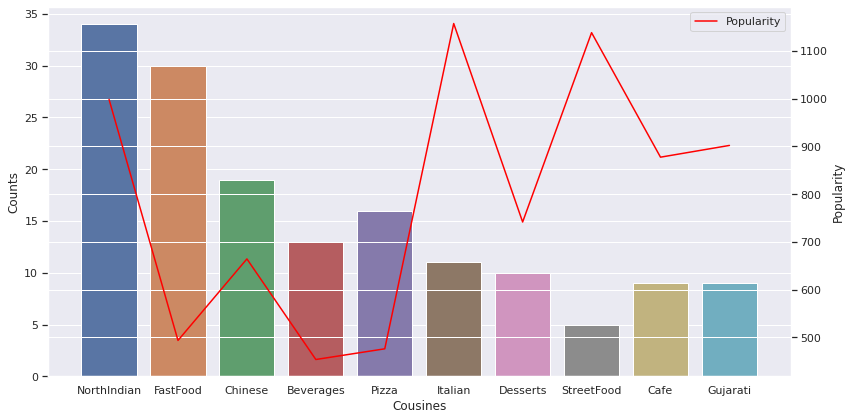

In [302]:
fig,ax1=plt.subplots(figsize=(12,6))
ax2=ax1.twinx()

plt.xticks(rotation='vertical')
sns.set(style='darkgrid')

sns.barplot(x='Cousines',y='Counts',data=df_alka_cousines,ax=ax1)
sns.lineplot(x='Cousines',y='Popularity',data=dic_poop_median['Alkapuri'],color='red',ax=ax2,label='Popularity')

ax2.legend(loc=0)
fig.tight_layout()

### Earlier sentence approved

### We can't really tell popular cousine type in particular area with just Popularity, and also we forgot that Zomato is an online platform. So, cousine type is not related to the Area. People can buy dishes anywhere from the city. 
### But, we can estimate which cousine type restaurents are most popular on zomato by area. For that Just consider deliver rating and counts.

In [303]:
df['Ultimate_pop']=df['Popularity']+(df['Delivery_rating']*df['Delivery_rating_counts'])

In [304]:
df['Ultimate_pop'].head(4)

0     85379.8
1    117431.5
2     76452.6
3    128703.3
Name: Ultimate_pop, dtype: float64

In [305]:
dic_area_all={}
for x in df['Area'].unique(): 
    index = df[df['Area']==x].index
    df_x = df.loc[index]
    
    cousines=[]
    for i in Cousines:
        Popularity_mean = df_x[df_x['Cousines'].str.contains(i)]['Ultimate_pop'].mean()
        Popularity_median = df_x[df_x['Cousines'].str.contains(i)]['Ultimate_pop'].median()
        Popularity_std = df_x[df_x['Cousines'].str.contains(i)]['Ultimate_pop'].std()
        Price_mean = df_x[df_x['Cousines'].str.contains(i)]['Price_for_2'].mean()
        Price_median = df_x[df_x['Cousines'].str.contains(i)]['Price_for_2'].median()
        Price_std = df_x[df_x['Cousines'].str.contains(i)]['Price_for_2'].std()
        dict1={'Cousines':i,
               'Popularity_mean':Popularity_mean,
               'Popularity_median':Popularity_median,
               'Popularity_std':Popularity_std,
              'Price_mean':Price_mean,
              'Price_median':Price_median,
              'Price_std':Price_std}
        cousines.append(dict1)

    dic_area_all["{0}".format(x)]=pd.DataFrame(cousines)

In [306]:
dic_area_all['Alkapuri']

,Cousines,Popularity_mean,Popularity_median,Popularity_std,Price_mean,Price_median,Price_std
0,NorthIndian,17804.717241,11817.60,19809.263755,620.588235,600.0,249.580754
1,FastFood,23054.528000,5618.10,48678.426247,365.000000,300.0,185.300315
2,Chinese,14156.300000,6218.40,14366.492727,642.105263,600.0,285.901672
3,Beverages,15822.941667,6343.55,21559.557231,461.538462,450.0,247.616846
4,Pizza,4957.392308,3105.40,4641.604414,459.375000,400.0,189.049156
5,Italian,6801.810000,4783.35,8123.783569,790.909091,800.0,326.969557
6,Desserts,9323.244444,5138.40,10404.891453,500.000000,450.0,221.108319
7,StreetFood,16008.940000,17417.40,10549.867414,380.000000,300.0,305.368630
8,Cafe,5473.137500,3117.80,5735.299898,505.555556,500.0,150.923086
9,Gujarati,18631.866667,10724.20,20349.358377,477.777778,500.0,169.762907


<AxesSubplot:xlabel='Cousines', ylabel='Popularity_median'>

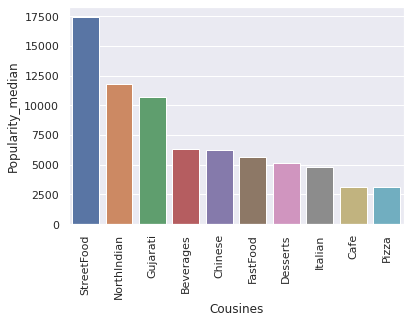

In [307]:
plt.xticks(rotation='vertical')
sns.barplot(x='Cousines',y='Popularity_median',data=dic_area_all['Alkapuri'].sort_values(by=['Popularity_median'],ascending=False))

### Finally, the result we were looking for. StreetFood is most popular zomato cousine type in alkapuri.

<AxesSubplot:xlabel='Cousines', ylabel='Popularity_median'>

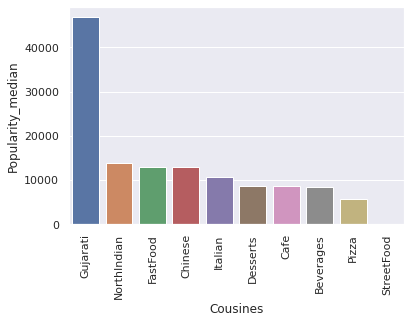

In [308]:
plt.xticks(rotation='vertical')
sns.barplot(x='Cousines',y='Popularity_median',data=dic_area_all['Sayajigunj'].sort_values(by=['Popularity_median'],ascending=False))

### Sayajigunj, The place where my hostel located, there is more than 3 big hostels including mine which covering thousands of students. Students mostly order their lunch or dinner online. That's why popularity of Gujarati restaurents is most in Sayajigunj.And classic gujarati dish must have been our first choice.

### Simply if someone wants to start restaurent near Hostel locations he/she better serve Gujarati dishes. Not just students can find the restaurent locally but delivery in online platforms would be easier.

##  Which cousine is most popular in Whole vadodara?

In [309]:
C=[]
P=[]
P_m=[]
Price_mean=[]
Price_median=[]
for i in Cousines:
    Popularity_mean = df[df['Cousines'].str.contains(i)]['Ultimate_pop'].mean()
    Popularity_median = df[df['Cousines'].str.contains(i)]['Ultimate_pop'].median()
    Price_Mean = df[df['Cousines'].str.contains(i)]['Price_for_2'].mean()
    Price_Median = df[df['Cousines'].str.contains(i)]['Price_for_2'].mean()
    
    
    C.append(i)
    P.append(Popularity_mean)
    P_m.append(Popularity_median)
    Price_mean.append(Price_Mean)
    Price_median.append(Price_Median)
    
    
df_total=pd.DataFrame({
        'Cousines':C,
        'Ultimate_Popularity_mean':P,
        'Ultimate_Popularity_median':P_m,
        'Price_mean':Price_mean,
        'Price_median':Price_median
        })

<AxesSubplot:xlabel='Ultimate_Popularity_median', ylabel='Cousines'>

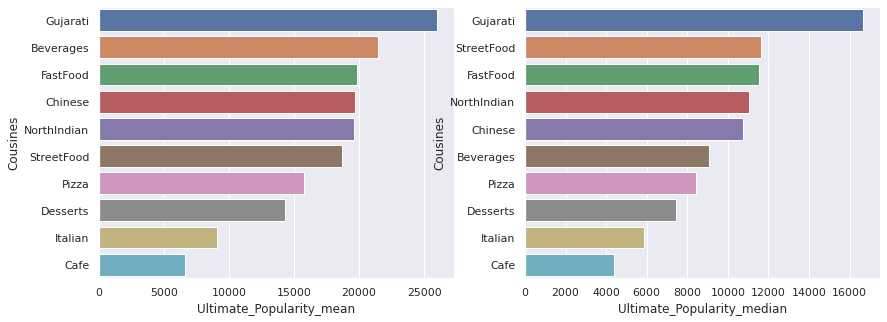

In [310]:
f,axes = plt.subplots(1,2,figsize=(14,5))

sns.barplot(y='Cousines',x='Ultimate_Popularity_mean',data=df_total.sort_values(by='Ultimate_Popularity_mean',ascending=False),ax=axes[0])
sns.barplot(y='Cousines',x='Ultimate_Popularity_median',data=df_total.sort_values(by='Ultimate_Popularity_median',ascending=False),ax=axes[1])

### Totally agrred with Results.

## which cousine type restaurents is cheap for 2 persons? 

In [311]:
df_cousin_pf2=pd.DataFrame({
    'cousin':[],
    'Price_for_2':[]
})

In [312]:
cousin=[]
pf2=[]
for i in Cousines:
    cousin.append(i)
    pf2.append(df[df['Cousines'].str.contains(i)]['Price_for_2'])
    df_cousin_pfx= pd.DataFrame({
        'cousin':i,
        'Price_for_2': df[df['Cousines'].str.contains(i)]['Price_for_2']
    })
    df_cousin_pf2 = df_cousin_pf2.append(df_cousin_pfx)

<AxesSubplot:xlabel='cousin', ylabel='Price_for_2'>

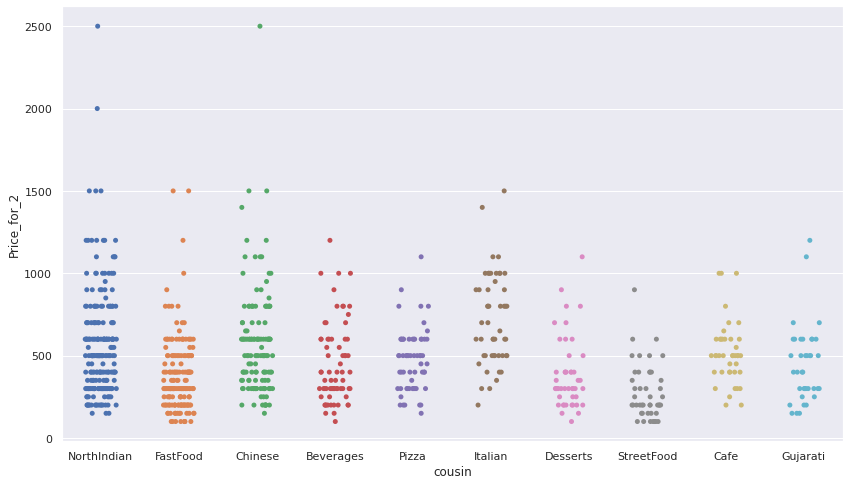

In [313]:
plt.figure(figsize=(14,8))
sns.stripplot(x='cousin',y='Price_for_2',data=df_cousin_pf2,jitter=0.2)

<AxesSubplot:xlabel='cousin', ylabel='Price_for_2'>

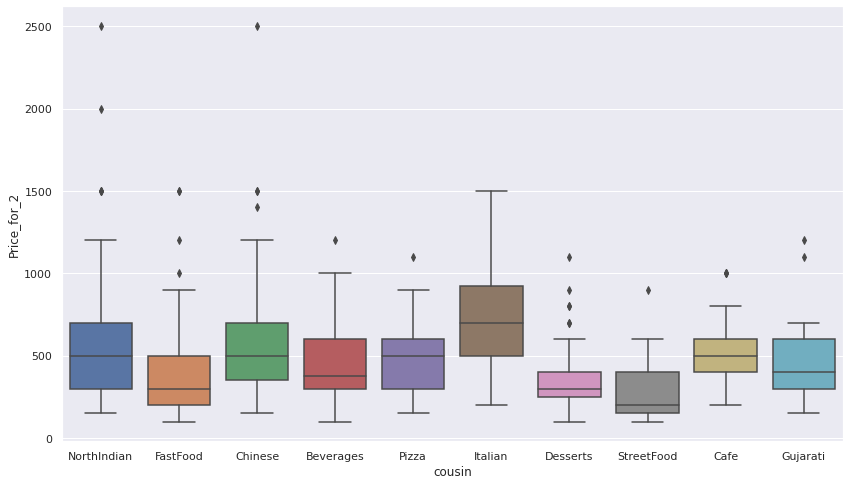

In [314]:
plt.figure(figsize=(14,8))
sns.boxplot(x='cousin',y='Price_for_2',data=df_cousin_pf2)

### Not much info,But  as we can see Street Food is quite cheap because it is a street food :>. Italian is quite costly. And we have lots of options for Price  in NorthIndian, FastFood, Chinese cousine type restaurents. Again there is no clear correlation.

## Which cousine type you recommend someone to order who's not fimiliar to vadodara's best? 

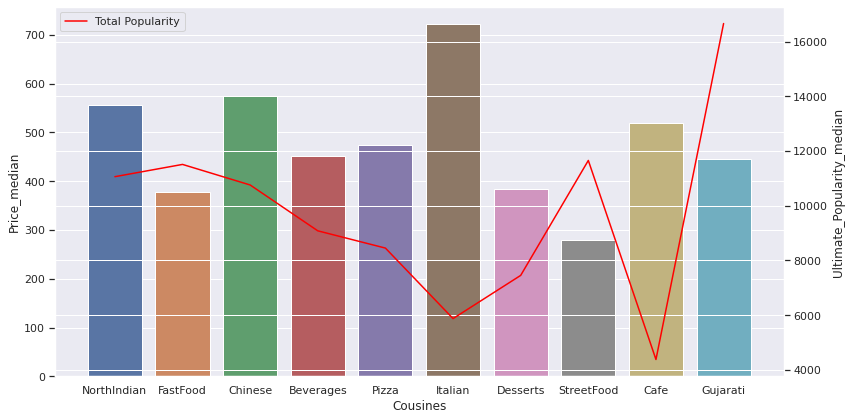

In [315]:
fig,ax1=plt.subplots(figsize=(12,6))
ax2=ax1.twinx()

plt.xticks(rotation='vertical')
sns.set(style='darkgrid')

sns.barplot(x='Cousines',y='Price_median',data=df_total,ax=ax1)
sns.lineplot(x='Cousines',y='Ultimate_Popularity_median',data=df_total,color='red',ax=ax2,label='Total Popularity')

ax2.legend(loc=0)
fig.tight_layout()

### Okay, Definetly tell  them to try Gujarati  Dishes, [Alert] this doesn't  mean other cousines are worst or Gujarati is the best. But we are saying that lots of people bought gujarati dishes, which psycologically mean it's somewhat better than others.

## Which cousine type restaurent is cheaper or costly in Alkapuri Area? 
## And which restaurent to choose if you are in Alkapuri Area?

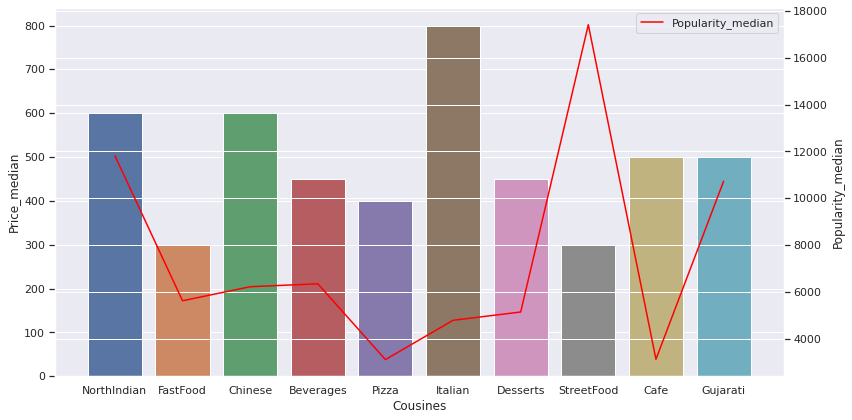

In [317]:
fig,ax1=plt.subplots(figsize=(12,6))
ax2=ax1.twinx()

plt.xticks(rotation='vertical')
sns.set(style='darkgrid')

sns.barplot(x='Cousines',y='Price_median',data=dic_area_all['Alkapuri'],ax=ax1)
sns.lineplot(x='Cousines',y='Popularity_median',data=dic_area_all['Alkapuri'],color='red',ax=ax2,label='Popularity_median')

ax2.legend(loc=0)
fig.tight_layout()

### As our data gave us information, if you are in Alkapuri area and ur budget is real low you should definetly buy SteetFood. And if you're with your girlfriend and still don't want to spend more money, you should try NorthIndian.

## In specific area at specific time which restaurent is best and what are the other options?

### [Jump to the Results](#Result)

In [318]:
Hours_range = []
for i in range(1,13):
    Hours_range.append('2020-10-15 '+str(i)+':00pm')
for i in range(1,13):
    Hours_range.append('2020-10-15 '+str(i)+':00am')

In [319]:
dic_area={}
for x in df['Area'].unique(): 
    index = df[df['Area']==x].index
    df_x = df.loc[index]
    dic_area["{0}".format(x)]=df_x

In [320]:
df_alkapuri = dic_area['Alkapuri']
df_alkapuri['week'].value_counts()

Mon-Sun)                  85
Mon-Sat),Closed(Sun)       2
Mon,Tue,Thu,Fri...         1
Mon-Sat),8am–3pm(Sun)      1
Mon),6pm–11pm(Tue-Sun)     1
Name: week, dtype: int64

### As I said during cleaning, we will not consider restaurents which are not availble for Mon-Sun.
  

In [321]:
df_alkapuri = df_alkapuri[df_alkapuri.loc[:,'week']=='Mon-Sun)']

In [322]:
df_alkapuri['week'].value_counts()

Mon-Sun)    85
Name: week, dtype: int64

In [328]:
df_alkapuri['1st_time_open']=pd.to_datetime(df_alkapuri['1st_time_open'])
df_alkapuri['1st_time_close']=pd.to_datetime(df_alkapuri['1st_time_close'])
df_alkapuri['2nd_time_close']=pd.to_datetime(df_alkapuri['2nd_time_close'])
df_alkapuri['2nd_time_open']=pd.to_datetime(df_alkapuri['2nd_time_open'])

In [329]:
df_alkapuri.dtypes

Restaurant                        object
Cousines                          object
Rating                           float64
Rating_counts                    float64
Delivery_rating                  float64
Delivery_rating_counts           float64
Area                              object
Adress                            object
Price_for_2                        int64
1st_time_open             datetime64[ns]
1st_time_close            datetime64[ns]
2nd_time_open             datetime64[ns]
2nd_time_close            datetime64[ns]
week                              object
Popularity                       float64
Ultimate_pop                     float64
dtype: object

In [330]:
df_alkapuri[((df_alkapuri['1st_time_open']<=pd.to_datetime('2020-10-15 11:00pm')) & (df_alkapuri['1st_time_close']>pd.to_datetime('2020-10-15 11:00pm')))|((df_alkapuri['2nd_time_open']<=pd.to_datetime('2020-10-15 1:00pm')) & (df_alkapuri['2nd_time_close']>pd.to_datetime('2020-10-15 1:00pm')))]

,Restaurant,Cousines,Rating,Rating_counts,Delivery_rating,Delivery_rating_counts,Area,Adress,Price_for_2,1st_time_open,1st_time_close,2nd_time_open,2nd_time_close,week,Popularity,Ultimate_pop
0,Jassi De Parathe,NorthIndian,4.7,1634.0,4.2,18500.0,Alkapuri,"R.C Dutt Road, Near Kalaniketan, Alkapuri, Vad...",600,2020-10-15 11:00:00,2020-10-15 23:30:00,NaT,NaT,Mon-Sun),7679.8,85379.8
275,Chaa Ne Lari,"Cafe,FastFood",3.7,105.0,3.8,4430.0,Alkapuri,"Opposite Rajkot Nagrik Sahkari Bank, Back side...",200,2020-10-15 07:00:00,2020-10-15 23:30:00,NaT,NaT,Mon-Sun),388.5,17222.5


### That looks messy, let's make it more readable.

In [331]:
filter1 = (df_alkapuri['1st_time_open']<=pd.to_datetime('2020-10-15 1:00pm')) & (df_alkapuri['1st_time_close']>pd.to_datetime('2020-10-15 1:00pm'))
filter2 = (df_alkapuri['2nd_time_open']<=pd.to_datetime('2020-10-15 1:00pm')) & (df_alkapuri['2nd_time_close']>pd.to_datetime('2020-10-15 1:00pm'))

In [332]:
dic_alka = {}
df_alkapuri = dic_area['Alkapuri']
   
for i in Hours_range:
    #print(i)
    filter1 = (df_alkapuri['1st_time_open']<=pd.to_datetime(i)) & (df_alkapuri['1st_time_close']>pd.to_datetime(i))
    filter2 = (df_alkapuri['2nd_time_open']<=pd.to_datetime(i)) & (df_alkapuri['2nd_time_close']>pd.to_datetime(i))
    
 
    df_y=df_alkapuri[filter1 | filter2]
    
    dic_alka['{0}'.format(i.split(' ')[1])]= df_y
    

In [333]:
Hours=[]
for i in Hours_range:
    Hours.append(i.split(' ')[1])

In [334]:
#Created dictionary of dataframes for 5 highest popularity restaurents in all 24 hours of time
#Used to obtain seaborn plots which failed

# dic_alka_5 = {}
# df_alkapuri = dic_area['Alkapuri']
   
# for i in Hours_range:
#     #print(i)
#     filter1 = (df_alkapuri['1st_time_open']<=pd.to_datetime(i)) & (df_alkapuri['1st_time_close']>pd.to_datetime(i))
#     filter2 = (df_alkapuri['2nd_time_open']<=pd.to_datetime(i)) & (df_alkapuri['2nd_time_close']>pd.to_datetime(i))
#     df_y=df_alkapuri[filter1 | filter2]
    
#     dic_alka_5['{0}'.format(i.split(' ')[1])]= df_y.nlargest(5,'Ultimate_pop')

### Plotting top 5 restaurents in alkaputi for each hour of day

### Here was one of the frustrating part. suprisingly seaborn gives error ploting empty dataframe as emplty plot.I tried to pass that error with if function but error presisted. So I thought of using 5 largest restaurents redimade dataframe for each hour, unfortuanetly that didn't work either. Finally, I came back to legend classic matplotlib pyplot. The only problem now is order of Title. 1:00am plot is actually right next plot, and sequence goes on. and 12:00pm is actually 12:00am. If anyone have solution please pull the request or send me mail. Other than it's fine.

### Result

<ipython-input-335-1b8a0f384b07>:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



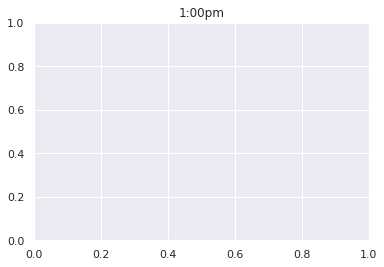

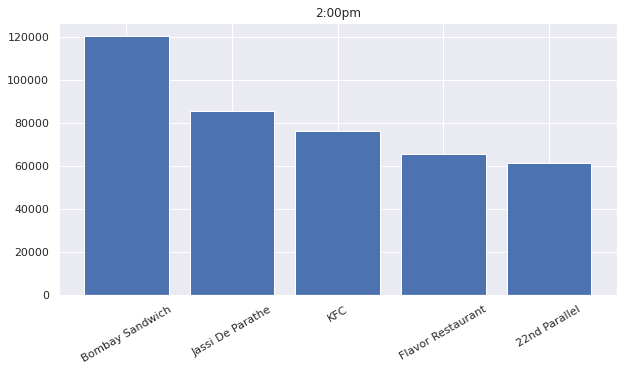

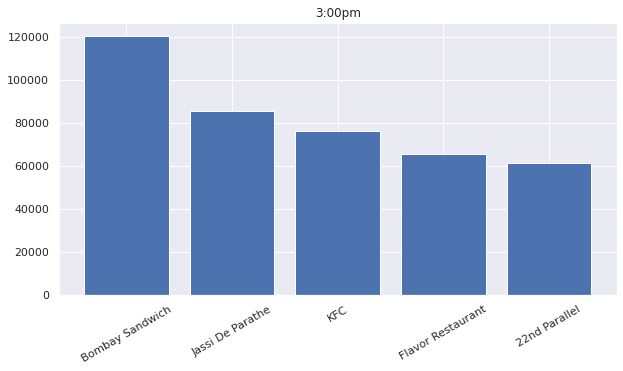

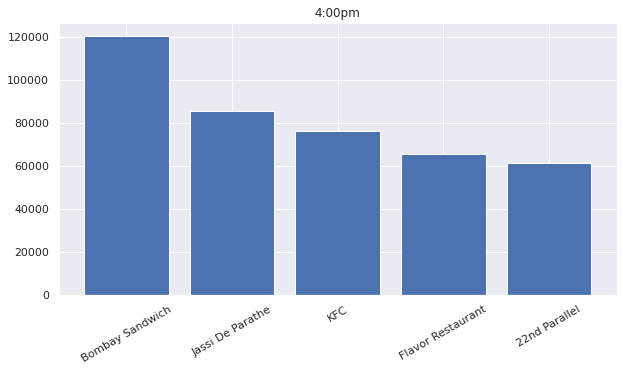

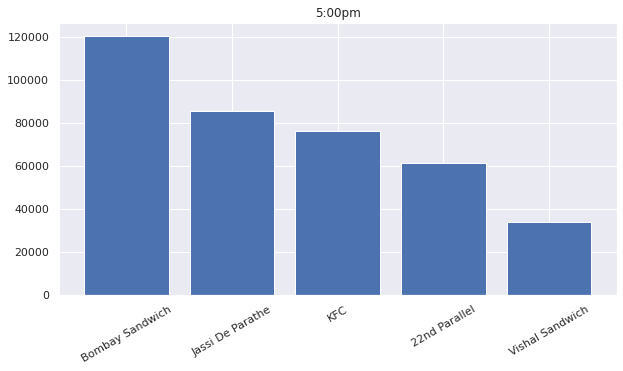

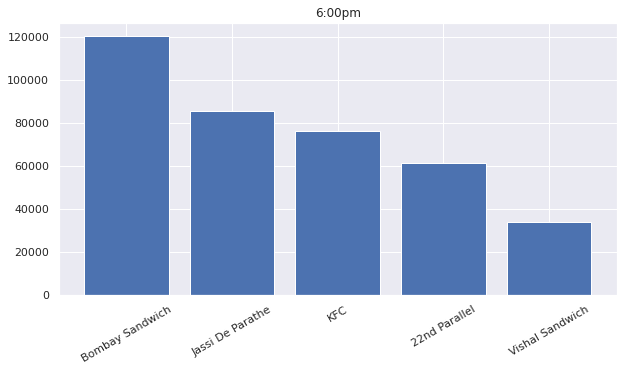

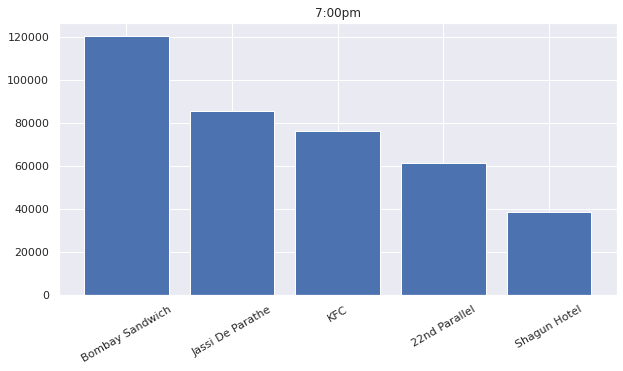

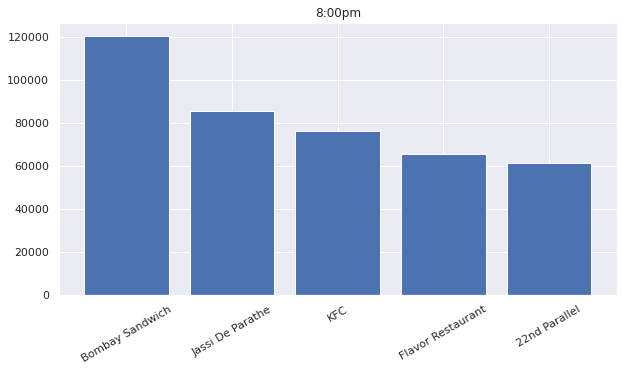

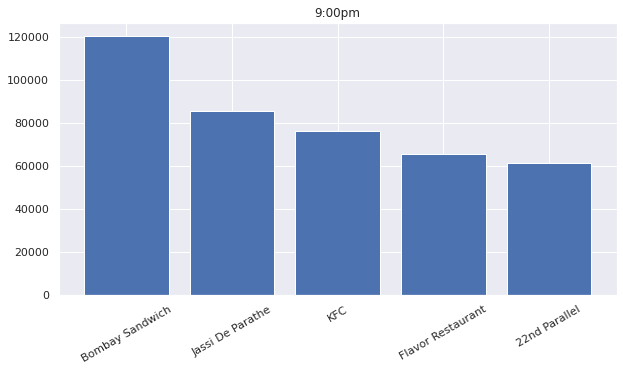

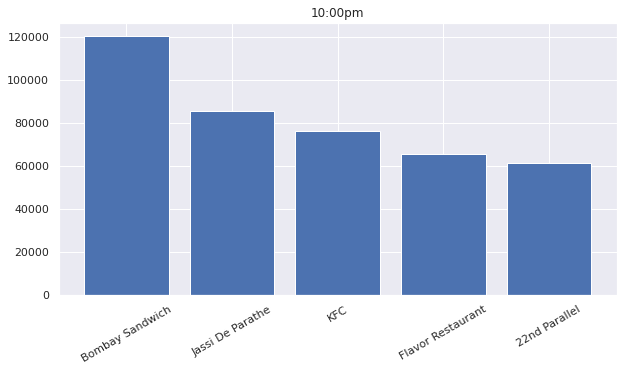

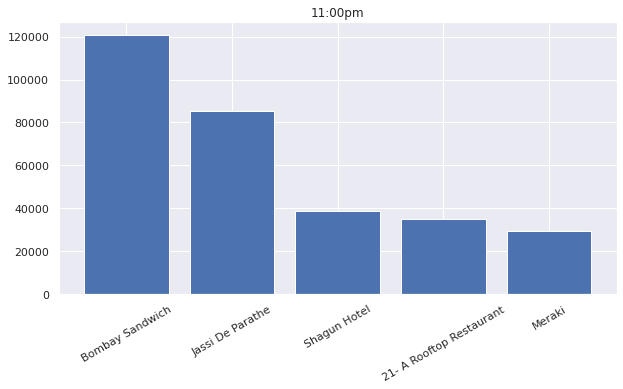

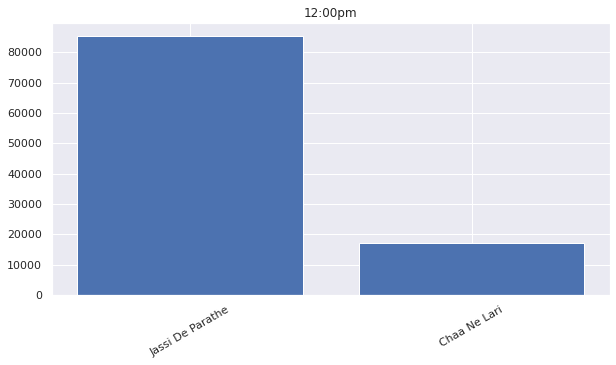

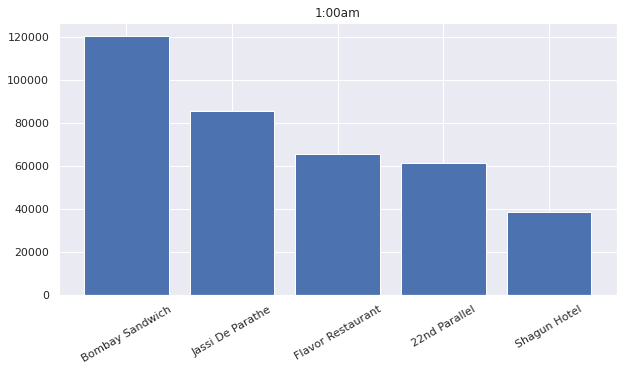

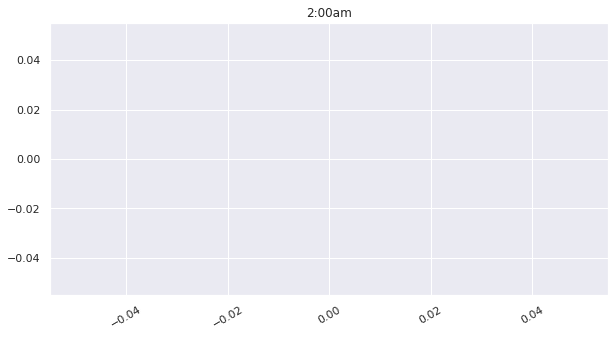

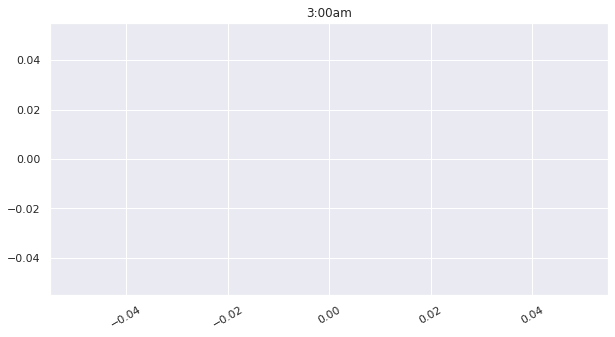

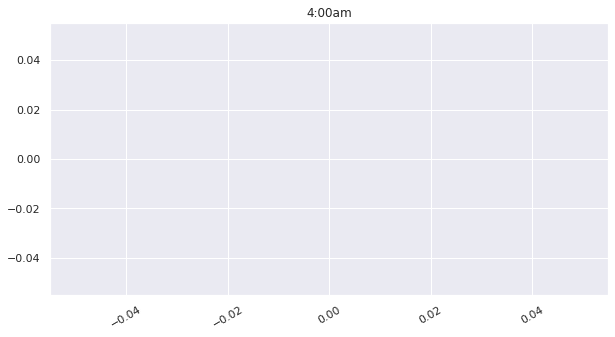

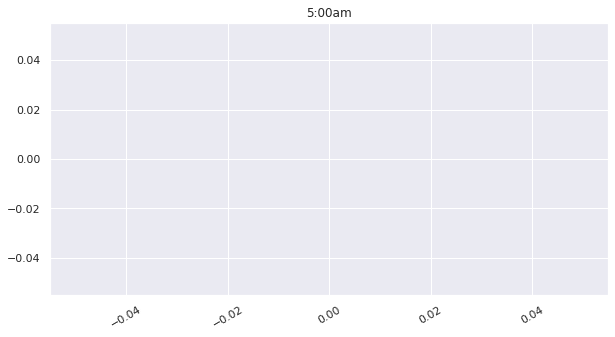

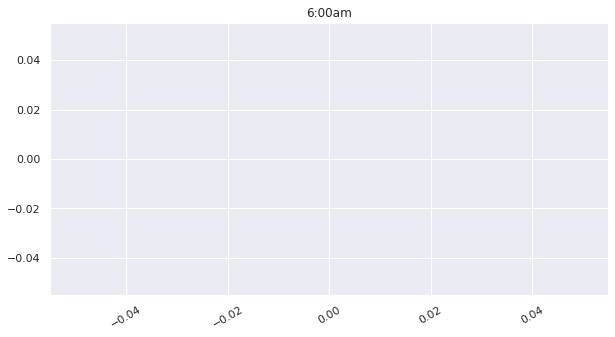

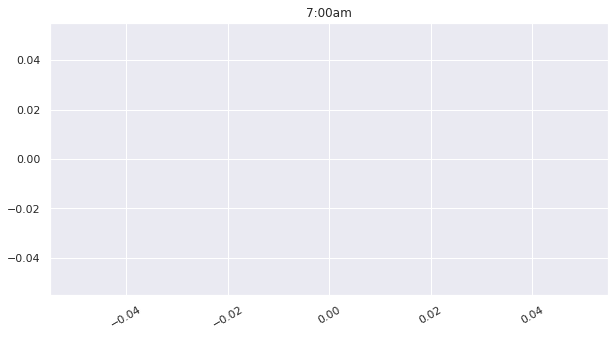

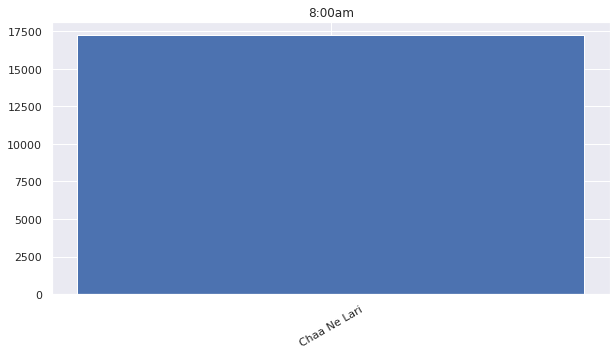

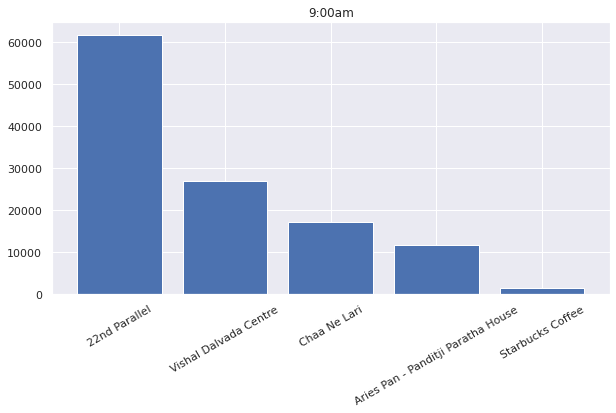

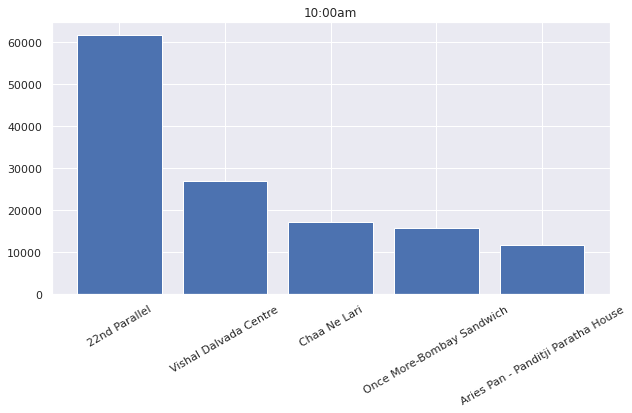

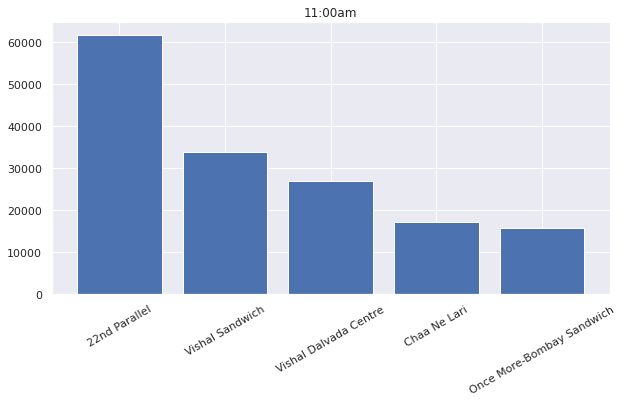

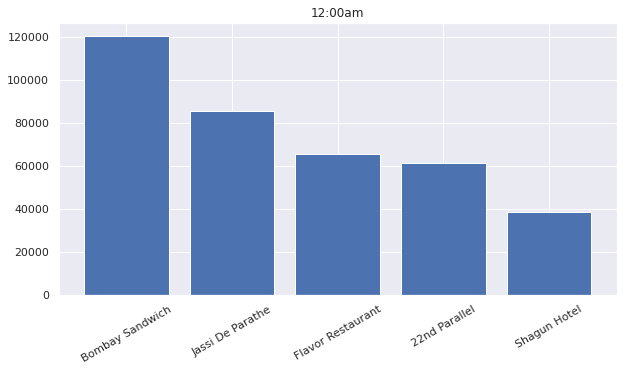

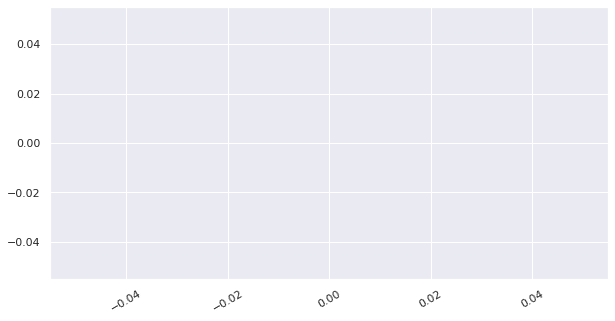

In [335]:
for i in Hours:
    #print(i)
    plt.title(i)
    plt.figure(figsize=(10,5))
    plt.xticks(rotation = 30)
    
    #seaborn
    #if dic_alka[i].empty:
        #pass
    #else:
        #sns.barplot...
        
    plt.bar(x='Restaurant',height='Ultimate_pop',data=dic_alka[i].nlargest(5,'Ultimate_pop'))

# There is still endless things left to reveal. But, once wiseman said '' Know what's important'' So, that's pretty much all for this dataset.  It was really fun, Some parts of analysis was quite frustrating and tricky, but that's what made this more enjoyable.

### Some Honarable mentions (Plot version)
### Not all plots make sence, Have a look

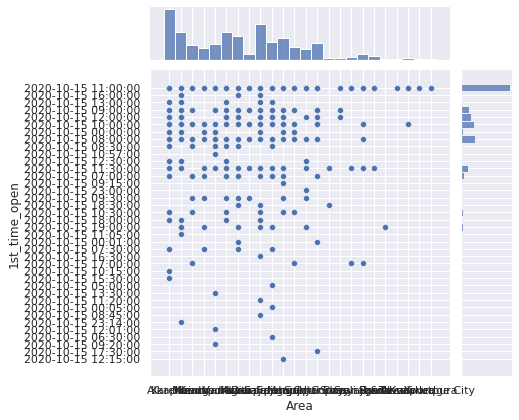

In [336]:
#Kinda loook like Robot
sns.jointplot(x='Area',y='1st_time_open',data=df)
#tried to remove axis(:()
#plt.axis('off')
#plt.tick_params(axis='both',which='both',bottom='off',top='off',labelbottom='off',labelleft='off',right='off',left='off')

<AxesSubplot:xlabel='cousin', ylabel='Price_for_2'>

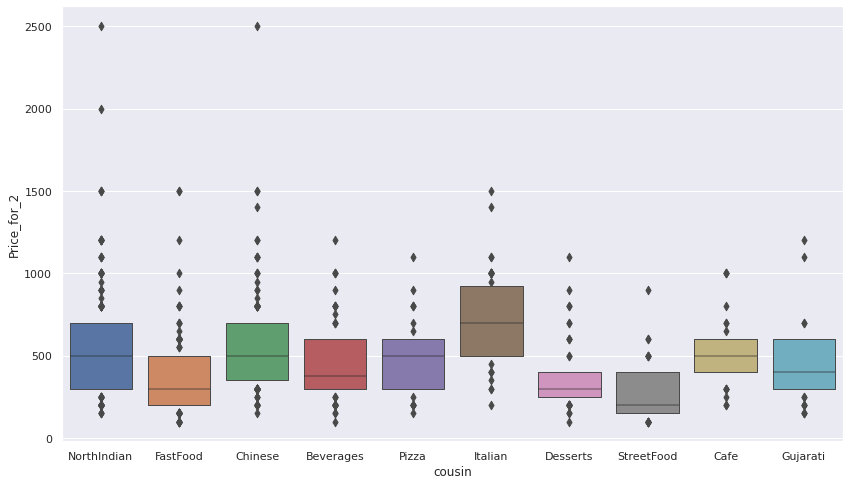

In [337]:
plt.figure(figsize=(14,8))
sns.boxenplot(x='cousin',y='Price_for_2',data=df_cousin_pf2,k_depth='proportion',outlier_prop=1)

<AxesSubplot:xlabel='Area', ylabel='1st_time_open'>

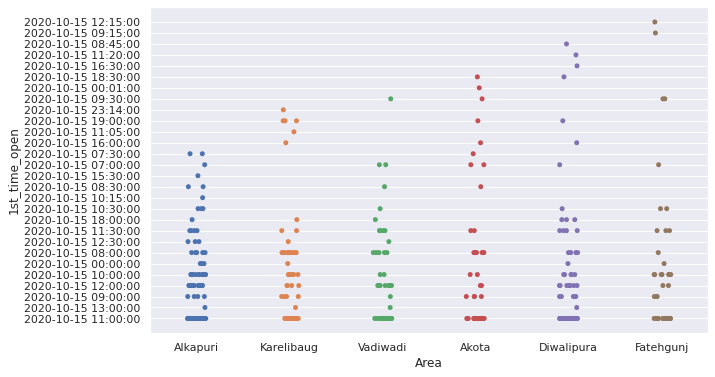

In [338]:
#I made this to see if there is any relation btw area and opening time 
plt.figure(figsize=(10,6))
sns.stripplot(x='Area',y='1st_time_open',data=df[df['Area'].isin(['Alkapuri','Diwalipura','Vadiwadi','Karelibaug','Akota','Fatehgunj'])])